# Decision Trees and Ensemble Methods

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Regression

### Import data

The market historical [data](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. This is a regression problem.

Attribute Information:

The inputs are as follows
* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

* The output,
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [2]:
data_reg = pd.read_csv('Real_Estate_valuation_data.csv')

In [3]:
data_reg.shape

(414, 8)

In [4]:
data_reg.head()

,No.,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data_reg=data_reg.drop('No.',axis=1)

In [6]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [7]:
data_reg.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Finding the correlation between features and label.

[]

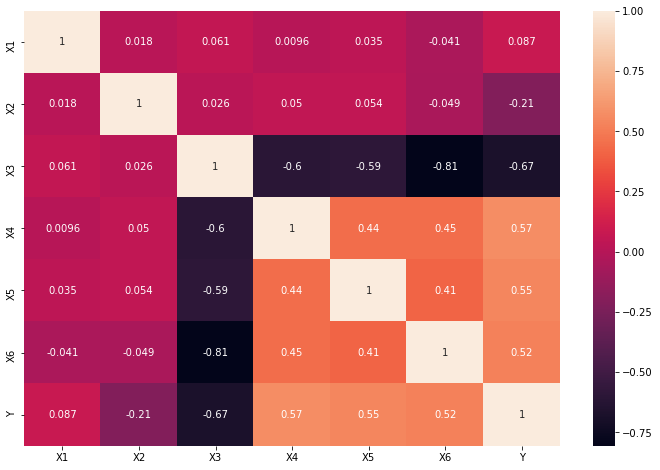

In [8]:
corr = data_reg.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.plot()

In [9]:
X = data_reg.iloc[:, :-1].values
y = data_reg.iloc[:, 6].values

### Splitting dataset to train/test set.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

### Decision Tree model.

In [11]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dt_reg=tree.DecisionTreeRegressor(random_state=0)
dt_reg=dt_reg.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(dt_reg.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(dt_reg.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 0.46


#### Feature Importances.

In [12]:
dt_reg.feature_importances_

array([0.04111388, 0.15383483, 0.6088242 , 0.03248628, 0.11599594,
       0.04774486])

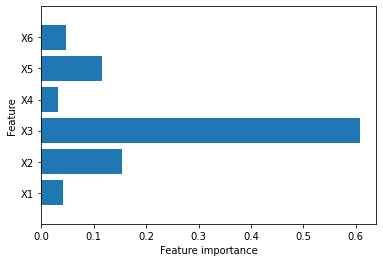

In [13]:
def plot_feature_imp(model):
    n_features=X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),data_reg.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_imp(dt_reg)

#### Plotting the tree.

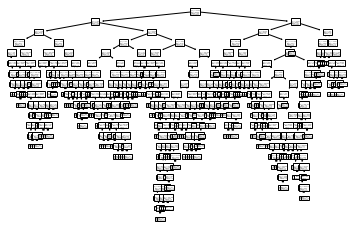

In [14]:
tree.plot_tree(dt_reg);

#### Using graphviz.

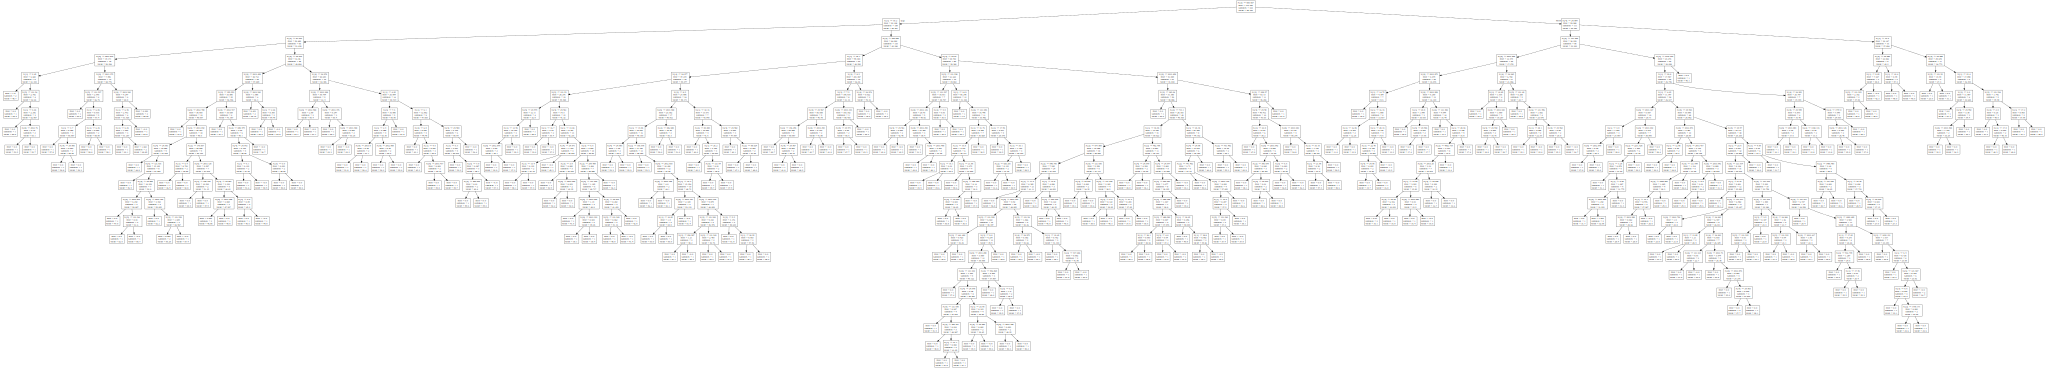

In [15]:
import graphviz                  
dot_data = tree.export_graphviz(dt_reg, out_file=None)
graph = graphviz.Source(dot_data)  
graph 

### Hyperparameter regularization

In [16]:
dt_reg1=tree.DecisionTreeRegressor(max_depth=5,random_state=0)
dt_reg1=dt_reg1.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(dt_reg1.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(dt_reg1.score(X_test,y_test)))

Accuracy of training set: 0.86
Accuracy of test set: 0.52


#### Feature Importances.

In [17]:
dt_reg1.feature_importances_

array([0.0213189 , 0.12532229, 0.67617278, 0.02533777, 0.11231539,
       0.03953286])

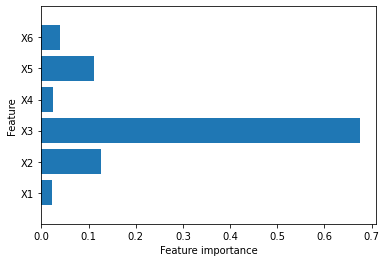

In [18]:
plot_feature_imp(dt_reg1)

#### Plotting the tree.

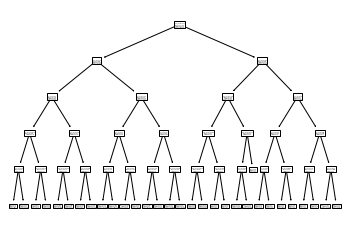

In [19]:
tree.plot_tree(dt_reg1);

### Linear regressor model.

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression().fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(lin_reg.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(lin_reg.score(X_test,y_test)))

Accuracy of training set: 0.61
Accuracy of test set: 0.48


## Classification problem

### Import data.
* The [data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contains the heart desease dataset of the Cleveland.

In [21]:
data_cls=pd.read_csv("processed_cleveland.data")

In [22]:
data_cls.shape

(303, 14)

In [23]:
data_cls.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
data_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    float64
 1   sex                     303 non-null    float64
 2   chest_pain_type         303 non-null    float64
 3   resting_blood_pressure  303 non-null    float64
 4   cholestoral             303 non-null    float64
 5   fasting_blood_sugar     303 non-null    float64
 6   resting_ecg             303 non-null    float64
 7   max_heart_rate          303 non-null    float64
 8   angina                  303 non-null    float64
 9   oldpeak                 303 non-null    float64
 10  slope                   303 non-null    float64
 11  ca                      303 non-null    object 
 12  thal                    303 non-null    object 
 13  diagnosis               303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory

In [25]:
data_cls.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Correlation among all features.

[]

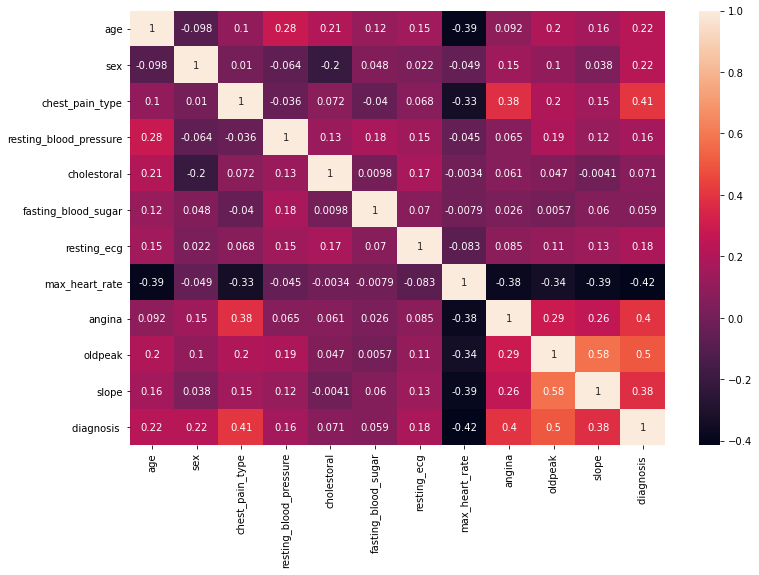

In [26]:
corr = data_cls.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.plot()

In [27]:
X= data_cls.drop(['ca','thal'],axis=1)
y= data_cls.iloc[:, 13].values

In [28]:
y= np.where(y<2,0,1)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

### Decision Tree model.

In [30]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_cls=tree.DecisionTreeClassifier(random_state=0)
dt_cls=dt_cls.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(dt_cls.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(dt_cls.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


#### Feature Importances.

In [31]:
dt_cls.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

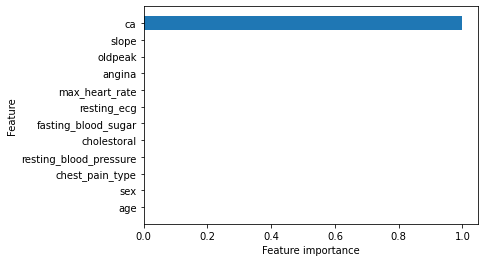

In [32]:
def plot_feature_imp(model):
    n_features=X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),data_cls.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_imp(dt_cls)

#### Plotting the tree.

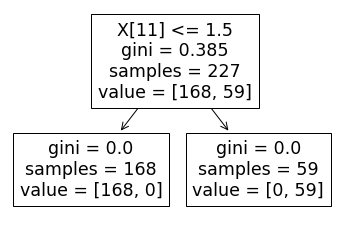

In [33]:
tree.plot_tree(dt_cls);

### Hyper parameter regularization.

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_cls1=DecisionTreeClassifier(max_depth=4,random_state=0)
dt_cls1=dt_cls1.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(dt_cls1.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(dt_cls1.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


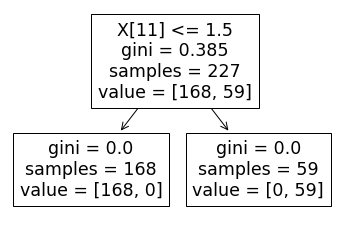

In [35]:
tree.plot_tree(dt_cls1);

#### Feature Importances.

In [36]:
dt_cls1.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

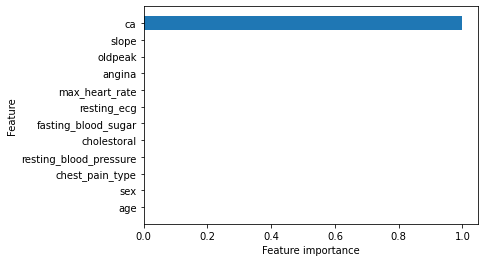

In [37]:
plot_feature_imp(dt_cls1)

### Ensembles of decision trees

#### Random forest classifier.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
forest=ensemble.RandomForestClassifier(n_estimators=4,random_state=0)
forest=forest.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(forest.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(forest.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 0.96


#### Feature Importances.

In [39]:
forest.feature_importances_

array([0.00977144, 0.01525856, 0.01460415, 0.03618087, 0.01116115,
       0.01151417, 0.        , 0.01644062, 0.01956745, 0.12349347,
       0.        , 0.74200811])

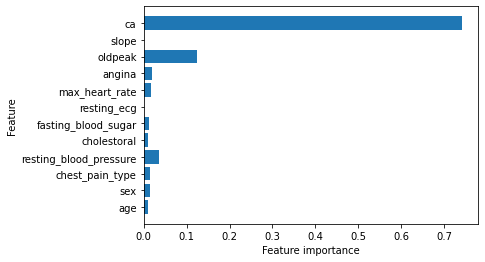

In [40]:
def plot_feature_imp(model):
    n_features=X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),data_cls.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_imp(forest)

#### Hyperparameter Regularization.

In [41]:
forest1=ensemble.RandomForestClassifier(n_estimators=100,random_state=0)
forest1=forest1.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(forest1.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(forest1.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


#### Feature Importances.

In [42]:
forest1.feature_importances_

array([0.04023204, 0.01106293, 0.04079777, 0.02294   , 0.03268492,
       0.00947451, 0.00374799, 0.05105071, 0.01857537, 0.10074601,
       0.02709026, 0.6415975 ])

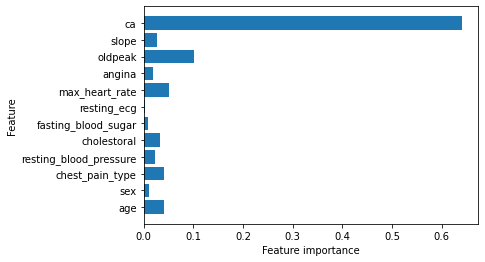

In [43]:
plot_feature_imp(forest1)

#### Gradient Boosted Regression trees.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0)
gbrt=gbrt.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(gbrt.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(gbrt.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


#### Feature Importances.

In [45]:
gbrt.feature_importances_

array([4.87975959e-16, 1.43174263e-18, 4.13383626e-19, 1.82782322e-16,
       5.54233660e-16, 2.08711803e-18, 1.77711115e-18, 1.65696395e-16,
       7.78929284e-19, 1.85214837e-16, 4.93064081e-20, 1.00000000e+00])

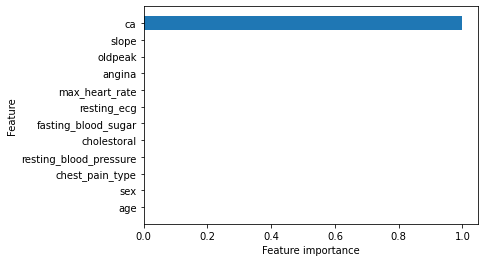

In [46]:
plot_feature_imp(gbrt)

#### Hyperparameter Regularization

In [47]:
gbrt1=GradientBoostingClassifier(random_state=12, max_depth=4)
gbrt1=gbrt1.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(gbrt1.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(gbrt1.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


#### Feature Importances.

In [48]:
gbrt1.feature_importances_

array([9.11620961e-16, 1.16232238e-16, 6.33324389e-18, 5.51590677e-18,
       4.67964358e-17, 4.38291585e-18, 1.55524348e-17, 7.50388480e-16,
       3.62668106e-19, 3.21241334e-16, 2.72978116e-18, 1.00000000e+00])

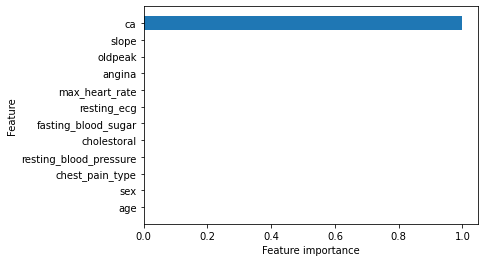

In [49]:
plot_feature_imp(gbrt1)

In [50]:
gbrt2=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt2=gbrt2.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(gbrt2.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(gbrt2.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


In [51]:
gbrt2.feature_importances_

array([ 2.50030843e-16,  3.91139095e-17,  1.26022137e-17,  1.89254281e-16,
        5.37345785e-16,  7.73946751e-18, -3.80030511e-19,  1.33964409e-16,
        6.98963808e-17,  2.41568769e-16,  1.31777407e-17,  1.00000000e+00])

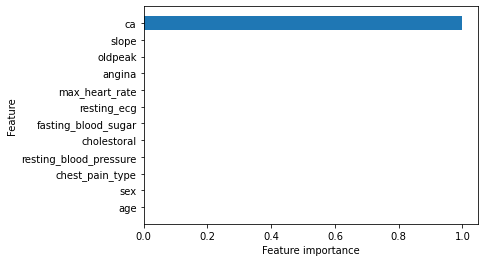

In [52]:
plot_feature_imp(gbrt2)

#### Adaboost 

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=600)
ab=ab.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(ab.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(ab.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


#### Feature Importances.

In [54]:
ab.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.15074894e-15, 1.00000000e+00])

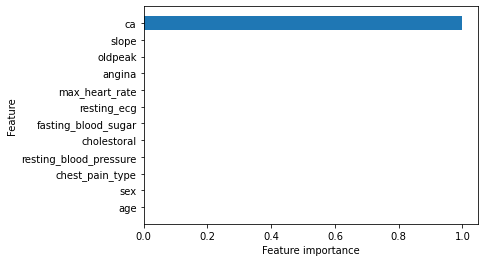

In [55]:
plot_feature_imp(ab)

In [56]:
ab1 = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),n_estimators=600)
ab1=ab1.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(ab1.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(ab1.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


#### Feature Importances.

In [57]:
ab1.feature_importances_

array([0.04462123, 0.00197197, 0.08107587, 0.03265611, 0.03161265,
       0.00986867, 0.00535388, 0.03845908, 0.01413147, 0.11650586,
       0.01690933, 0.60683386])

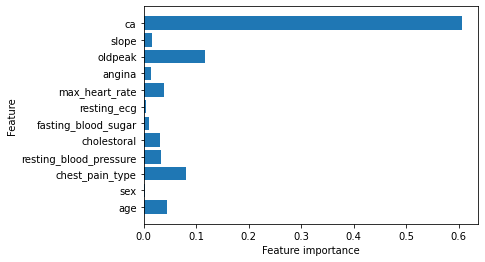

In [58]:
plot_feature_imp(ab1)

### Voting classifier

In [59]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [60]:
estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=20)),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=20)),
    ('lr',LogisticRegression()) 
]

#### Hard voting classifier.

In [61]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [62]:
vc.fit(X_train,y_train)

/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=20)),
                             ('svc', SVC(probability=True)),
                             ('knc', KNeighborsClassifier()),
                             ('abc',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=20)),
                             ('lr', LogisticRegression())])

In [63]:
print("Accuracy of training set: {:.2f}".format(vc.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(vc.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


In [64]:
for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(X_test,y_test))

rf 1.0
svc 0.6710526315789473
knc 0.7631578947368421
abc 1.0
lr 1.0


#### Soft voting classifier.

In [65]:
vc = VotingClassifier(estimators=estimators, voting='soft')

In [66]:
vc.fit(X_train,y_train)

/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=20)),
                             ('svc', SVC(probability=True)),
                             ('knc', KNeighborsClassifier()),
                             ('abc',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=20)),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [67]:
print("Accuracy of training set: {:.2f}".format(vc.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(vc.score(X_test,y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 1.00


In [68]:
for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(X_test,y_test))

rf 1.0
svc 0.6710526315789473
knc 0.7631578947368421
abc 1.0
lr 1.0


### Model Select

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds=5
scoring='accuracy'
seedNum=42
models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC(random_state=seedNum)))
models.append(('BDT',BaggingClassifier(random_state=seedNum)))
models.append(('RF',RandomForestClassifier(random_state=seedNum)))
models.append(('ET',ExtraTreesClassifier(random_state=seedNum)))
results=[]
names=[]
metrics=[]

In [70]:
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seedNum)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg="%s: %f" %(name,cv_results.mean())
    print(msg)
    
print('Average metrics ('+scoring+') from all models:', np.mean(metrics))

/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.674010
SVM: 0.740097
BDT: 1.000000


/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 1.000000


/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 1.000000
Average metrics (accuracy) from all models: 0.8828212560386474
